# CPL 5559 -B220 - CPL -Applied Project

## Libraries

In [1]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#for database
#!python -m pip install "pymongo[srv]"
from pymongo import MongoClient
import json

In [3]:
#for other pyhon modules
import import_ipynb

## Python Modules

In [5]:
import DEF_MFS_MVP_Storage as mDB

## Python Classes

### Define Class to input tickers

In [6]:
class Ticker:
    
    def get_tickername(self):
        ticker_number=int(input("Enter number of tickers you want"))
        tickers=[]
        for i in range(ticker_number):
            ticker=input("Enter ticker symbol:")
            tickers.append(ticker)
        tickers=" ".join(tickers)
        return tickers
    

### Define class for yahoo finance

In [7]:
class yfinance:
    
    #constructor to initialize instance variables
    def __init__(self,ticker, start_date,end_date):
        #ticker: stock ticker symbol
        #star_date : start date from when the stock prices is to be extracted
        #end_date : final date upto which the stock prices is to be extracted
        self.ticker=ticker
        self.start=start_date
        self.end=end_date
        
    #instance method to extract stock prices of a any one ticker
    def get_stockmarketdata_indv(self):
        # for individual ticker we use the yf.ticker module
        #yf.Ticker to create a ticker object for a particular ticker
        stock = yf.Ticker(self.ticker)
        #print(stock.info)
        #.history to get historical market data
        stock_df = stock.history(period='1d',start=self.start, end=self.end,actions=False)
        #period ='1d' means we want to extract stock market data once every day between the specified dates
        return stock_df
    
    #instance method to extract stock prices for all specified tickers
    def get_stockmarketdata_all(self):
        #To download the historical data for multiple tickers at once you can use the download module.
        #converting to string
        merged_stock_df = yf.download(self.ticker,period='1d', start=self.start, end=self.end,group_by='tickers')
        return merged_stock_df

        

### Define Class for Displaying and Saving Outputs

In [8]:
class output:
    #class for displaying output and saving files
    def __init__(self,value,output_name):
        self.value=value
        self.name=output_name
        
    def output_print(self):
        #this function will print values, list, arrays and others
        print(self.value)
        
    def output_display(self):
        #this function will display pandas dataframe as a table
        display(self.value)
        
    def output_savecsv(self):
        #this functuion will save output as csv
        self.value.to_csv(self.name+".csv")
    
    def output_plot(self):
        #this function will make a line plot of all the stock market data
        open_close=self.value
        open_close.reset_index(inplace=True)
        open_close.plot(x="Date", y=["Open","Close"],figsize=(12, 12))
        plt.title("Line plot for open and closed stock market prices for : "+ self.name,fontsize=20)
        plt.xlabel("Date",fontsize=15)
        plt.ylabel("Stock market Data",fontsize=15)
        plt.show()
        

## Main


In [9]:
#initialize start and end date
start_date = "2021-01-01"
end_date = "2022-12-31"

### Tesla stock prices

In [10]:
#define a class object
tesla_Data = yfinance("TSLA", start_date, end_date)


In [11]:
#extract stock data by calling the class's instance method
Tesla=tesla_Data.get_stockmarketdata_indv()

In [12]:
type(Tesla)

pandas.core.frame.DataFrame

In [13]:
#show stock data in tabular form by calling class's instance method
Tesla_output=output(Tesla,"Tesla")
Tesla_output.output_display()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,225166500
...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500


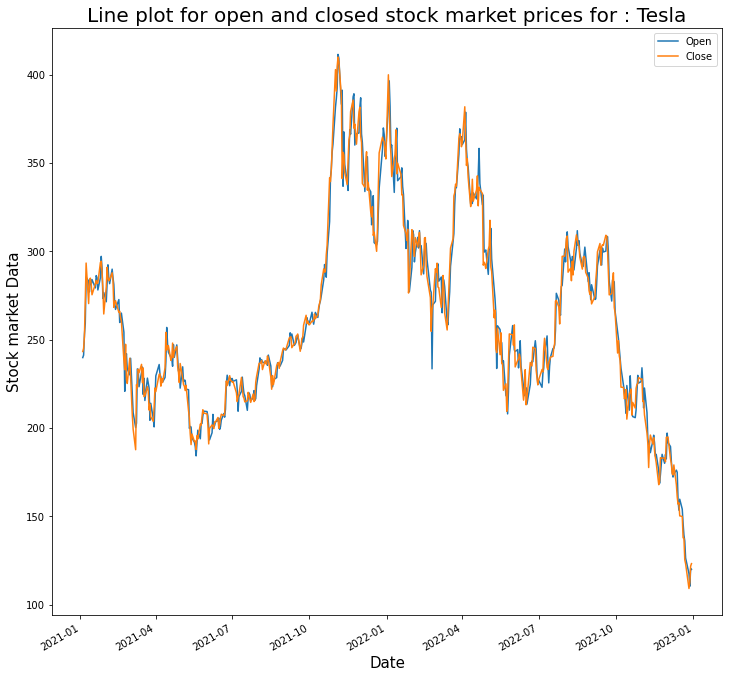

In [14]:
#show lineplot for open and close values
Tesla_output.output_plot()

In [15]:
#save to csv
Tesla_output.output_savecsv()

### Ford Stock Prices

In [16]:
#define class object for Ford
ford_Data = yfinance("F", start_date, end_date)

In [17]:
#extract stock data
Ford=ford_Data.get_stockmarketdata_indv()

In [18]:
#show stock data in tabular form by calling class's instance method
Ford_output=output(Ford,"Ford")
Ford_output.output_display()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,8.489097,8.518004,8.122939,8.209661,85043100
2021-01-05,8.161482,8.402376,8.151846,8.334925,70127800
2021-01-06,8.469825,8.614361,8.363833,8.518004,72590200
2021-01-07,8.614360,8.749261,8.556546,8.729990,77117100
2021-01-08,8.768533,8.807076,8.566182,8.672175,59162200
...,...,...,...,...,...
2022-12-23,11.270000,11.400000,11.220000,11.360000,38200700
2022-12-27,11.280000,11.390000,11.130000,11.200000,44837400
2022-12-28,11.180000,11.250000,10.900000,10.950000,49375400


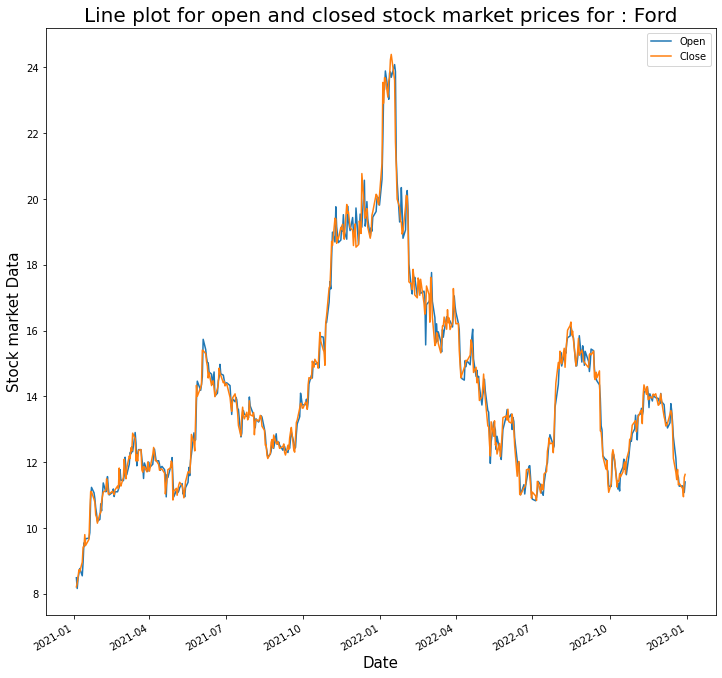

In [19]:
#show lineplot for open and close values
Ford_output.output_plot()

In [20]:
#save stock prices to csv
Ford_output.output_savecsv()

### Stock Prices for both Tesla and Ford

In [23]:
#input tickers using the Ticker class
Tick=Ticker()
tickers=Tick.get_tickername()
print(tickers)

Enter number of tickers you want2
Enter ticker symbol:TSLA
Enter ticker symbol:F
TSLA F


In [24]:
#define a class object
tesla_ford_Data = yfinance(tickers, start_date, end_date)

In [25]:
#extract stock data
Tesla_Ford=tesla_ford_Data.get_stockmarketdata_all()

[*********************100%***********************]  2 of 2 completed


In [26]:
#show stock data in tabularTesla_Ford form by calling class's instance method
Tsla_ford_output=output(Tesla_Ford,"Tesla_Ford")
Tsla_ford_output.output_display()

TSLA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-01-04  239.820007  248.163330  239.063339  243.256668  243.256668   
2021-01-05  241.220001  246.946671  239.733337  245.036667  245.036667   
2021-01-06  252.830002  258.000000  249.699997  251.993332  251.993332   
2021-01-07  259.209991  272.329987  258.399994  272.013336  272.013336   
2021-01-08  285.333344  294.829987  279.463318  293.339996  293.339996   
...                ...         ...         ...         ...         ...   
2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
2022-12-27  117.500000  119.669998  108.760002  109.099998  109.099998   
2022-12-28  110.349998  116.269997  108.239998  112.709999  112.709999   
2022-12-29  120.389999  123.570000  117.500000  121.820000  121.820000   
2022-12-30  119.949997  124.480003  119.750000  123.180000  123.180000   

                           F                                            
               Volume   Open   High    Low  Close  Adj Close    Volume  
Date                                                                    
2021-01-04  145914600   8.81   8.84   8.43   8.52   8.209660  85043100  
2021-01-05   96735600   8.47   8.72   8.46   8.65   8.334924  70127800  
2021-01-06  134100000   8.79   8.94   8.68   8.84   8.518004  72590200  
2021-01-07  154496700   8.94   9.08   8.88   9.06   8.729991  77117100  
2021-01-08  225166500   9.10   9.14   8.89   9.00   8.672176  59162200  
...               ...    ...    ...    ...    ...        ...       ...  
2022-12-23  166989700  11.27  11.40  11.22  11.36  11.360000  38200700  
2022-12-27  208643400  11.28  11.39  11.13  11.20  11.200000  44837400  
2022-12-28  221070500  11.18  11.25  10.90  10.95  10.950000  49375400  
2022-12-29  221923300  11.08  11.55  11.05  11.54  11.540000  53550300  
2022-12-30  157304500  11.40  11.64  11.39  11.63  11.630000  39149700  

[503 rows x 12 columns]

In [27]:
#save stock prices to csv
Tsla_ford_output.output_savecsv()

### Create database, store data to database and fetch data from database

#### Tesla

In [61]:
#define class object
mongoDB=mDB.MongoDbAtlas()

In [62]:
#retrive username, password and host_address from JSON
username,password,host_address=mongoDB.fetch_creds("DEF-MFS-MVP-Configuration.JSON")
#use the retrived credentials to connect to mongoDB database
mongoDB.connect_database(username,password,host_address)
#create database and collection
Tesla_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Tesla")

In [63]:
#Tesla_collection

In [64]:
#store the stock price data into the database
mongoDB.store_stockdata(Tesla,Tesla_collection)

Backend at MongoDb Atlas 

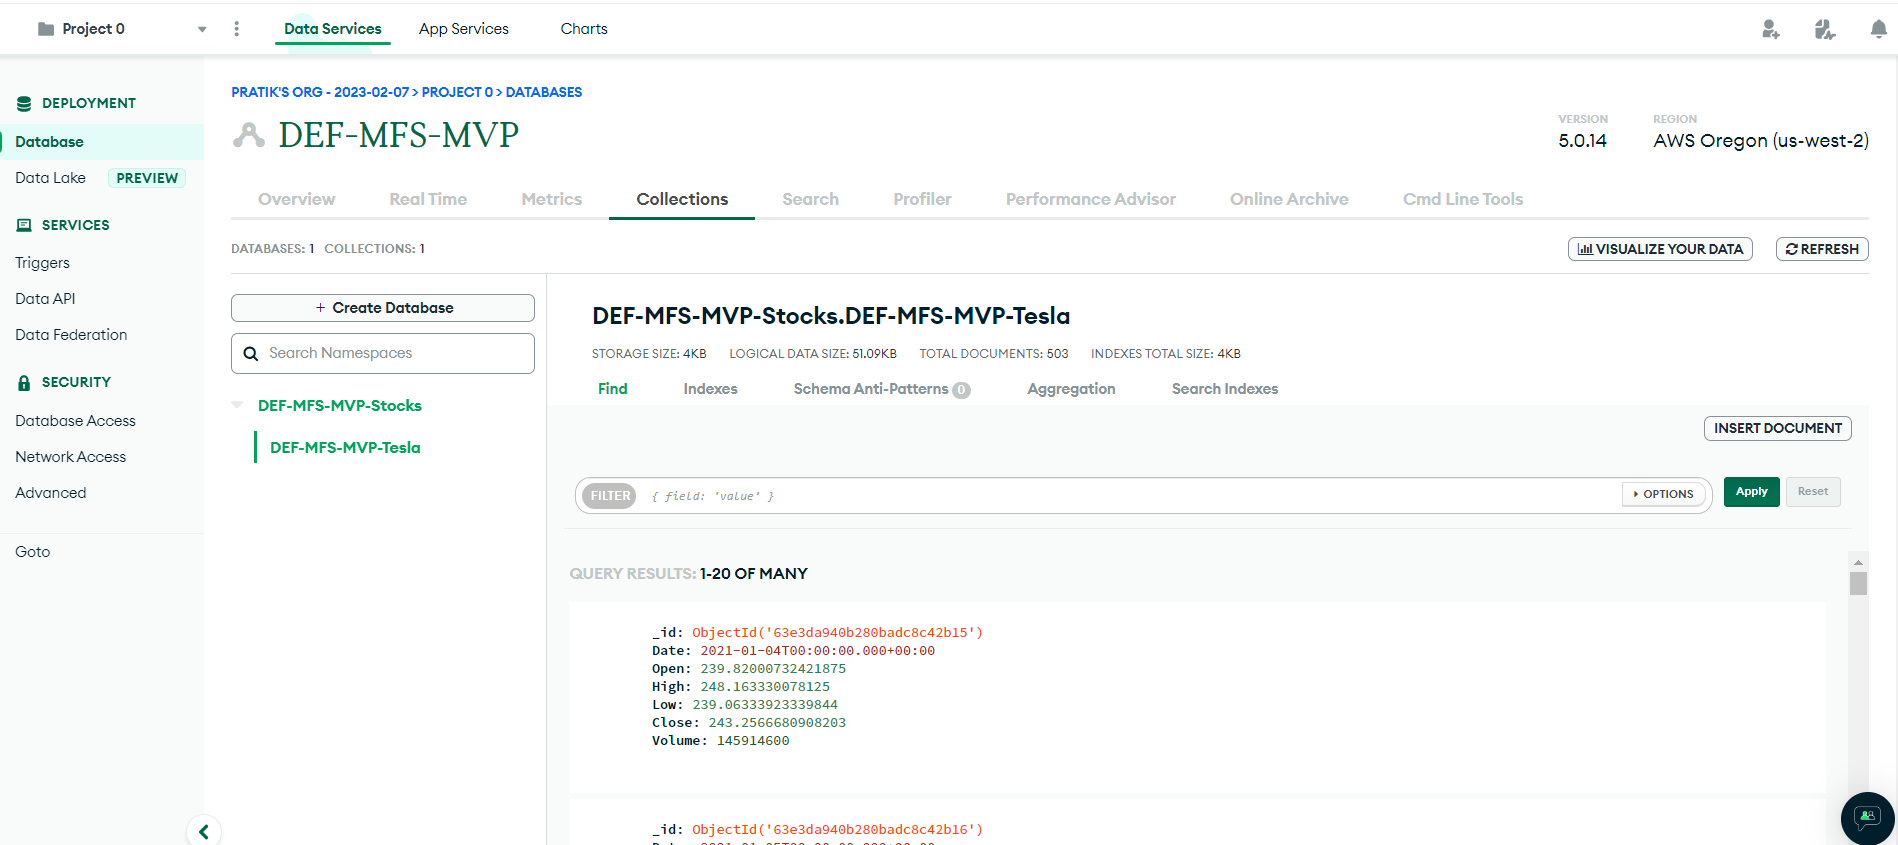

In [65]:
#retrive stock markey data as list of dictionaries and dataframe
dic_from_db_tesla,df_from_db_tesla=mongoDB.fetch_dbdata(Tesla_collection)

In [66]:
#dic_from_db

In [67]:
#df_from_db

In [68]:
#we use output class
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_tesla,Tesla)
op.output_display()

[{'_id': ObjectId('63e3da940b280badc8c42b15'),
  'Date': datetime.datetime(2021, 1, 4, 0, 0),
  'Open': 239.82000732421875,
  'High': 248.163330078125,
  'Low': 239.06333923339844,
  'Close': 243.2566680908203,
  'Volume': 145914600},
 {'_id': ObjectId('63e3da940b280badc8c42b16'),
  'Date': datetime.datetime(2021, 1, 5, 0, 0),
  'Open': 241.22000122070312,
  'High': 246.94667053222656,
  'Low': 239.73333740234375,
  'Close': 245.0366668701172,
  'Volume': 96735600},
 {'_id': ObjectId('63e3da940b280badc8c42b17'),
  'Date': datetime.datetime(2021, 1, 6, 0, 0),
  'Open': 252.8300018310547,
  'High': 258.0,
  'Low': 249.6999969482422,
  'Close': 251.9933319091797,
  'Volume': 134100000},
 {'_id': ObjectId('63e3da940b280badc8c42b18'),
  'Date': datetime.datetime(2021, 1, 7, 0, 0),
  'Open': 259.2099914550781,
  'High': 272.3299865722656,
  'Low': 258.3999938964844,
  'Close': 272.0133361816406,
  'Volume': 154496700},
 {'_id': ObjectId('63e3da940b280badc8c42b19'),
  'Date': datetime.datetim

In [69]:
#display the extracted stock market data from MongoDB in a tabular structure.#we use output class
op=output(df_from_db_tesla,Tesla)
op.output_display()

,_id,Date,Open,High,Low,Close,Volume
0,63e3da940b280badc8c42b15,2021-01-04,239.820007,248.163330,239.063339,243.256668,145914600
1,63e3da940b280badc8c42b16,2021-01-05,241.220001,246.946671,239.733337,245.036667,96735600
2,63e3da940b280badc8c42b17,2021-01-06,252.830002,258.000000,249.699997,251.993332,134100000
3,63e3da940b280badc8c42b18,2021-01-07,259.209991,272.329987,258.399994,272.013336,154496700
4,63e3da940b280badc8c42b19,2021-01-08,285.333344,294.829987,279.463318,293.339996,225166500
...,...,...,...,...,...,...,...
498,63e3da940b280badc8c42d07,2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700
499,63e3da940b280badc8c42d08,2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400
500,63e3da940b280badc8c42d09,2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500
501,63e3da940b280badc8c42d0a,2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300


#### Ford

In [70]:
#create a new collection for ford
Ford_collection=mongoDB.create_database("DEF-MFS-MVP-Stocks","DEF-MFS-MVP-Ford")

In [71]:
#store ford stpock market data into database
mongoDB.store_stockdata(Ford,Ford_collection)

Backend at MongoDb Atlas Database

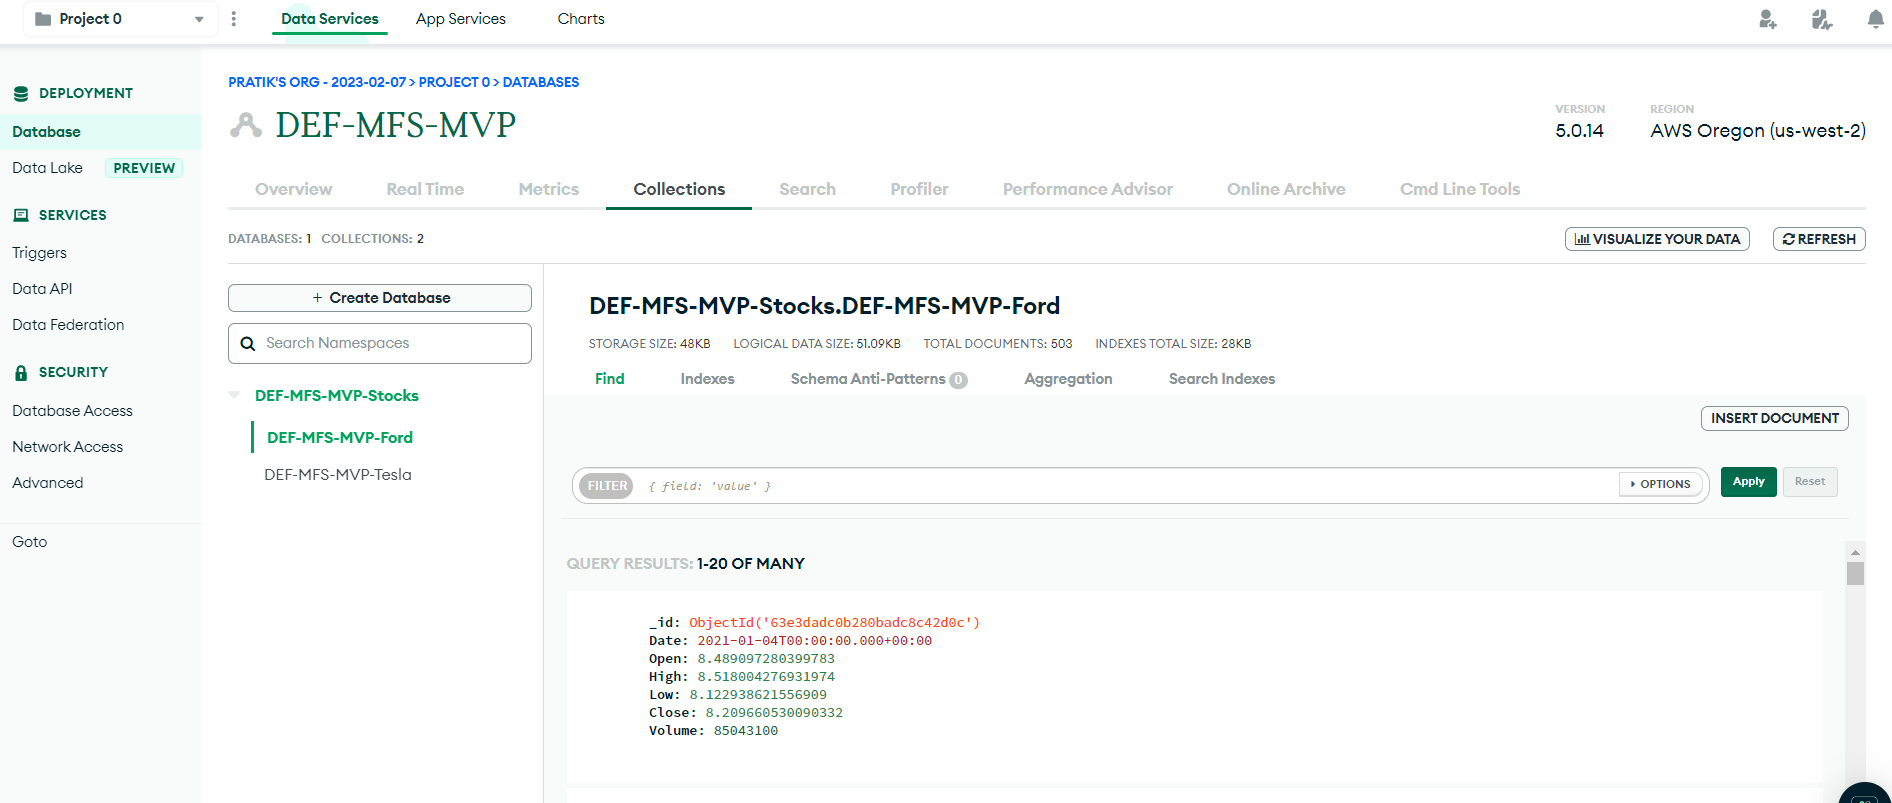

In [52]:
#retrive stock market data of Ford as list of dictionaries and dataframe
dic_from_db_ford,df_from_db_ford=mongoDB.fetch_dbdata(Ford_collection)

In [60]:
#display the extracted stock market data from MongoDB in a DICTIONARY STRUCTURE
op=output(dic_from_db_ford,Ford)
op.output_display()

[{'_id': ObjectId('63e3d6360b280badc8c42726'),
  'Date': datetime.datetime(2021, 1, 4, 0, 0),
  'Open': 8.489097280399783,
  'High': 8.518004276931974,
  'Low': 8.122938621556909,
  'Close': 8.209660530090332,
  'Volume': 85043100},
 {'_id': ObjectId('63e3d6360b280badc8c42727'),
  'Date': datetime.datetime(2021, 1, 5, 0, 0),
  'Open': 8.16148179537951,
  'High': 8.402375583398317,
  'Low': 8.15184582331391,
  'Close': 8.334924697875977,
  'Volume': 70127800},
 {'_id': ObjectId('63e3d6360b280badc8c42728'),
  'Date': datetime.datetime(2021, 1, 6, 0, 0),
  'Open': 8.4698254764466,
  'High': 8.614361380428235,
  'Low': 8.363832541455857,
  'Close': 8.518004417419434,
  'Volume': 72590200},
 {'_id': ObjectId('63e3d6360b280badc8c42729'),
  'Date': datetime.datetime(2021, 1, 7, 0, 0),
  'Open': 8.614360195488953,
  'High': 8.749261027869373,
  'Low': 8.556546209423585,
  'Close': 8.729990005493164,
  'Volume': 77117100},
 {'_id': ObjectId('63e3d6360b280badc8c4272a'),
  'Date': datetime.dateti

In [53]:
#display the extracted Ford stock market data from MongoDB in a tabular structure.
#we use output class
op=output(df_from_db_ford,Ford)
op.output_display()

,_id,Date,Open,High,Low,Close,Volume
0,63e3d6360b280badc8c42726,2021-01-04,8.489097,8.518004,8.122939,8.209661,85043100
1,63e3d6360b280badc8c42727,2021-01-05,8.161482,8.402376,8.151846,8.334925,70127800
2,63e3d6360b280badc8c42728,2021-01-06,8.469825,8.614361,8.363833,8.518004,72590200
3,63e3d6360b280badc8c42729,2021-01-07,8.614360,8.749261,8.556546,8.729990,77117100
4,63e3d6360b280badc8c4272a,2021-01-08,8.768533,8.807076,8.566182,8.672175,59162200
...,...,...,...,...,...,...,...
498,63e3d6360b280badc8c42918,2022-12-23,11.270000,11.400000,11.220000,11.360000,38200700
499,63e3d6360b280badc8c42919,2022-12-27,11.280000,11.390000,11.130000,11.200000,44837400
500,63e3d6360b280badc8c4291a,2022-12-28,11.180000,11.250000,10.900000,10.950000,49375400
501,63e3d6360b280badc8c4291b,2022-12-29,11.080000,11.550000,11.050000,11.540000,53550300
